# Analyse des données : quelques graphes

### Import des librairies 

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

### Import du dataset 

In [4]:
file_path ='/Users/saimanenawal/Downloads/offres_emploi_concatene_cleaned.csv'

In [5]:
df=pd.read_csv(file_path)
print(df.head())


                                            intitule        source  \
0  Administrateur systèmes et réseaux informatiqu...  Informatique   
1                        Technicien informatique F/H  Informatique   
2  Ingénieur de production/exploitation informati...  Informatique   
3                      Technicien informatique (H/F)  Informatique   
4           Chef de projet réseau informatique (H/F)  Informatique   

   departement  salaire_annuel  etude_requise  experience_requise  contrat  \
0         41.0         38000.0            5.0                24.0        2   
1         69.0         24238.0            NaN                12.0        2   
2         41.0         35000.0            5.0                60.0        2   
3          NaN         27000.0            5.0                 0.0        0   
4         74.0         45000.0            NaN               132.0        0   

  romeCode_extract  tps_Pp  secteur_activite  qualificationCode  
0              M18     1.0              78.0

## Distribution des salaires 

#### Boxplot

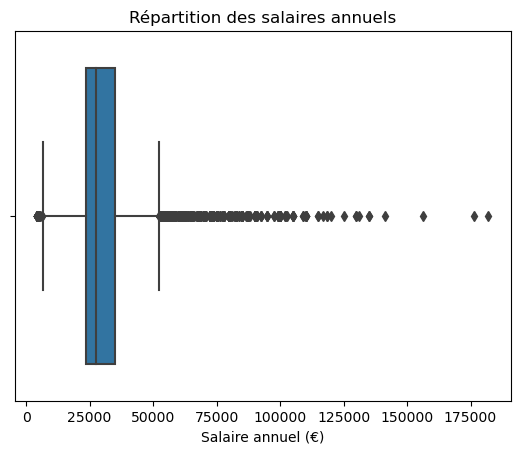

In [6]:
sns.boxplot(data=df, x='salaire_annuel')
plt.title('Répartition des salaires annuels')
plt.xlabel('Salaire annuel (€)')
plt.show()

* Ce boxplot global montre la distribution de l'ensemble des salaires dans le dataset sans distinction par catégorie.
    * La majorité des salaires semble se situer autour de 25 000 € par an, comme indiqué par la médiane.
    * Les valeurs aberrantes dépassent 100 000 €, mais elles sont rares. Cela reflète probablement des postes de direction ou des secteurs spécialisés.
    * Le graphe confirme que la moyenne des salaires est relativement basse (~25 000 €) dans l’ensemble des données, ce qui peut être influencé par un grand nombre de postes moins rémunérés (comme les CDD ou contrats précaires).
    * La concentration des valeurs dans le premier quartile et les nombreuses valeurs aberrantes suggèrent une asymétrie importante dans la répartition des salaires.


## Répartition des salaires par catégorie (transport, media, etc )

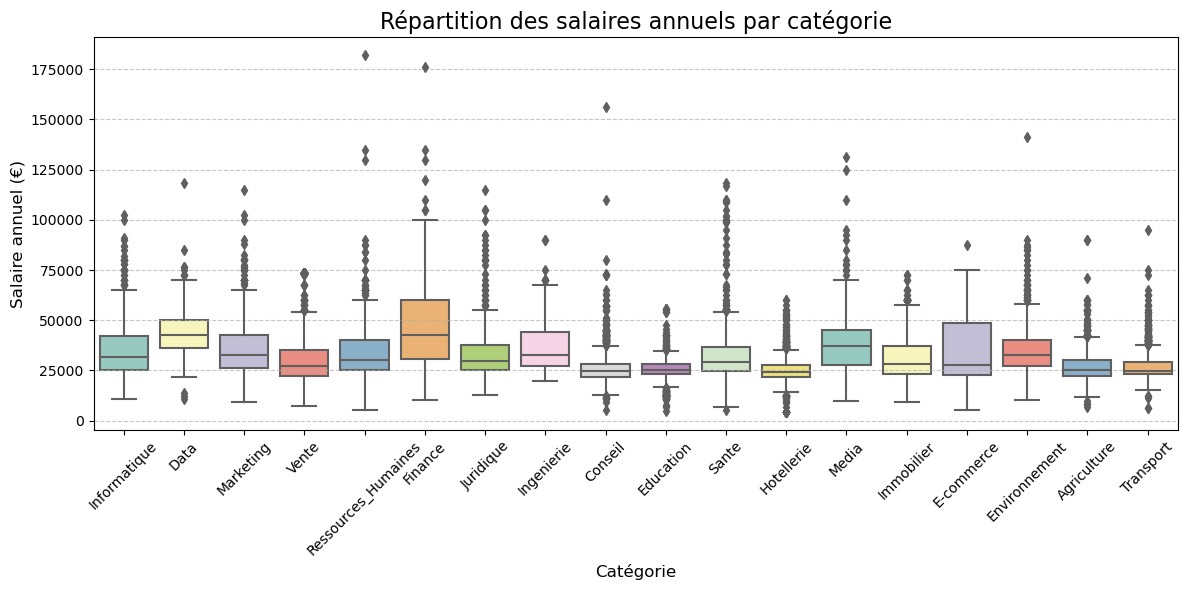

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data= df, x='source', y='salaire_annuel', palette='Set3' )
plt.title("Répartition des salaires annuels par catégorie", fontsize=16)
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Salaire annuel (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha =0.7)
plt.tight_layout()
plt.show()

* Ce boxplot met en évidence la dispersion des salaires pour chaque catégorie.
    * Certaines catégories, comme Finance ou Immobilier, présentent des salaires élevés avec une plus grande dispersion. Cela peut indiquer des postes hautement rémunérés dans ces secteurs, mais également une forte variabilité.
    * D'autres catégories, comme Santé ou Éducation, semblent avoir des salaires plus bas et moins dispersés, indiquant une certaine homogénéité.

 * Les métiers de la finance et de l'immobilier ont probablement des opportunités de haut niveau qui tirent les salaires vers le haut.
 * Les métiers de l'éducation et de la santé semblent offrir des salaires plus modestes, ce qui reflète généralement les tendances du marché pour ces secteurs.


## Répartition des salaires par région

In [8]:
departements_noms = {
    1: "Ain", 2: "Aisne", 3: "Allier", 4: "Alpes-de-Haute-Provence",
    5: "Hautes-Alpes", 6: "Alpes-Maritimes", 7: "Ardèche", 8: "Ardennes",
    9: "Ariège", 10: "Aube", 11: "Aude", 12: "Aveyron", 13: "Bouches-du-Rhône",
    14: "Calvados", 15: "Cantal", 16: "Charente", 17: "Charente-Maritime",
    18: "Cher", 19: "Corrèze", 20: "Corse", 21: "Côte-d'Or",
    22: "Côtes-d'Armor", 23: "Creuse", 24: "Dordogne", 25: "Doubs",
    26: "Drôme", 27: "Eure", 28: "Eure-et-Loir", 29: "Finistère",
    30: "Gard", 31: "Haute-Garonne", 32: "Gers", 33: "Gironde", 34: "Hérault",
    35: "Ille-et-Vilaine", 36: "Indre", 37: "Indre-et-Loire", 38: "Isère",
    39: "Jura", 40: "Landes", 41: "Loir-et-Cher", 42: "Loire", 43: "Haute-Loire",
    44: "Loire-Atlantique", 45: "Loiret", 46: "Lot", 47: "Lot-et-Garonne",
    48: "Lozère", 49: "Maine-et-Loire", 50: "Manche", 51: "Marne",
    52: "Haute-Marne", 53: "Mayenne", 54: "Meurthe-et-Moselle", 55: "Meuse",
    56: "Morbihan", 57: "Moselle", 58: "Nièvre", 59: "Nord", 60: "Oise",
    61: "Orne", 62: "Pas-de-Calais", 63: "Puy-de-Dôme", 64: "Pyrénées-Atlantiques",
    65: "Hautes-Pyrénées", 66: "Pyrénées-Orientales", 67: "Bas-Rhin",
    68: "Haut-Rhin", 69: "Rhône", 70: "Haute-Saône", 71: "Saône-et-Loire",
    72: "Sarthe", 73: "Savoie", 74: "Haute-Savoie", 75: "Paris",
    76: "Seine-Maritime", 77: "Seine-et-Marne", 78: "Yvelines", 79: "Deux-Sèvres",
    80: "Somme", 81: "Tarn", 82: "Tarn-et-Garonne", 83: "Var", 84: "Vaucluse",
    85: "Vendée", 86: "Vienne", 87: "Haute-Vienne", 88: "Vosges", 89: "Yonne",
    90: "Territoire de Belfort", 91: "Essonne", 92: "Hauts-de-Seine", 
    93: "Seine-Saint-Denis", 94: "Val-de-Marne", 95: "Val-d'Oise",
    971: "Guadeloupe", 972: "Martinique", 973: "Guyane",
    974: "La Réunion", 976: "Mayotte"
}


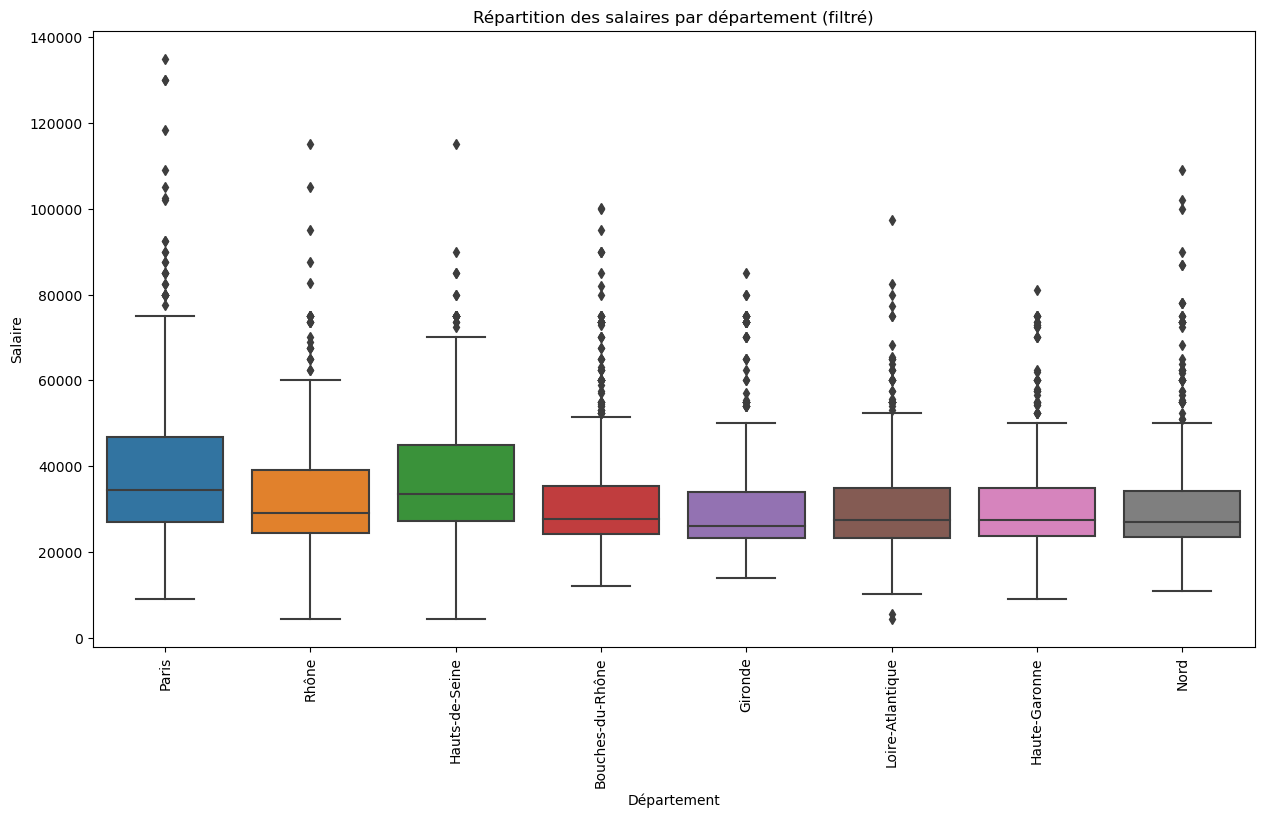

In [9]:
# Définir le seuil minimum d'offres par région
seuil_offres = 1000

# Ajouter une colonne 'Nom Département' en utilisant le dictionnaire
df['Nom Département'] = df['departement'].map(departements_noms)

# Filtrer les départements avec un nombre d'offres supérieur ou égal au seuil
offres_par_departement = df['Nom Département'].value_counts()
departements_a_garder = offres_par_departement[offres_par_departement >= seuil_offres].index
df_filtre = df[df['Nom Département'].isin(departements_a_garder)]

# Créer le boxplot pour les départements avec suffisamment d'offres
plt.figure(figsize=(15, 8))
sns.boxplot(
    x='Nom Département', 
    y='salaire_annuel', 
    data=df_filtre, 
    order=departements_a_garder
)
plt.title("Répartition des salaires par département (filtré)")
plt.xticks(rotation=90)
plt.xlabel("Département")
plt.ylabel("Salaire")
plt.show()

* Le boxplot montre que la médiane des salaires est globalement similaire dans la majorité des départements, ce qui suggère une certaine homogénéité des salaires à l'échelle nationale.
* Cependant, deux départements se démarquent : Paris (75) et les Hauts-de-Seine (92), où la médiane des salaires est plus élevée. Cela reflète une concentration plus importante de postes mieux rémunérés dans ces zones, souvent liée à des fonctions stratégiques ou à des entreprises situées dans des hubs économiques majeurs.


* Paris et les Hauts-de-Seine abritent une grande densité d'entreprises sièges, notamment dans les secteurs comme la finance, le consulting, la technologie et les grands groupes industriels.
* Les opportunités d'emplois de cadres ou de professions hautement qualifiées y sont plus fréquentes, ce qui explique une médiane plus élevée et probablement une plus grande dispersion des salaires.


## Répartition des salaires par années d'études requises

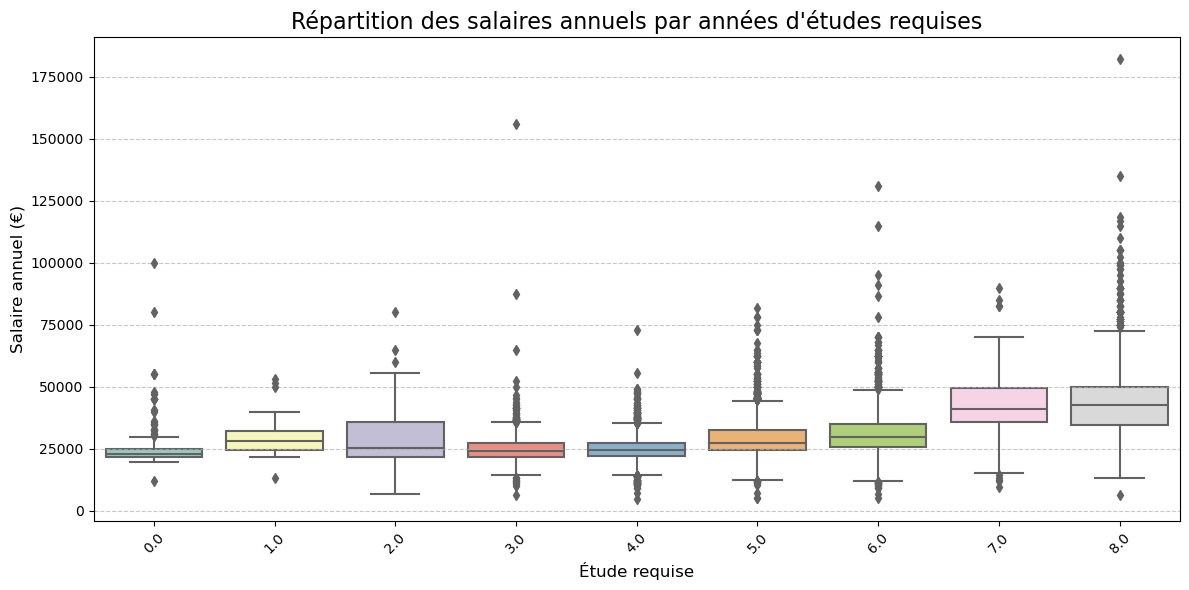

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data= df, x='etude_requise', y='salaire_annuel', palette='Set3' )
plt.title("Répartition des salaires annuels par années d'études requises", fontsize=16)
plt.xlabel('Étude requise', fontsize=12)
plt.ylabel('Salaire annuel (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha =0.7)
plt.tight_layout()
plt.show()

* Le boxplot montre une relation entre les années d'études requises et le salaire annuel proposé.
* On observe une tendance générale où le salaire médian augmente avec le niveau d'études.
* Cependant, il y a une forte dispersion pour certaines catégories (avec des valeurs aberrantes, notamment pour les niveaux élevés d'études).

Cela montre que les études influencent le salaire, mais la variation (écarts interquartiles) pourrait refléter des différences sectorielles, géographiques ou de niveau de poste.


## Distribution des entreprises recrutant pour une catégorie spécifique


In [11]:
file_path_1 ='/Users/saimanenawal/Documents/fichier_concaténé1.csv'

In [12]:
df_1=pd.read_csv(file_path_1)
print(df_1.head())

           company                                          job_title  \
0  Tenzing Conseil               Manager Transformations durables H/F   
1     SAPER VEDERE  Social Media Analyst & Conseil en Influence / ...   
2          Eskimoz                  Consultant Paid Media H/F - stage   
3            Talan                                  Manager Média H/F   
4        datashake         Consultant Paid Media Senior - CDI - Paris   

                                 date             contract  \
0   Friday 06 December 2024, 08:15 AM                  CDI   
1   Tuesday 29 October 2024, 10:53 AM  Stage (6 à 12 mois)   
2  Tuesday 03 December 2024, 10:49 AM       Stage (6 mois)   
3  Tuesday 24 December 2024, 09:01 AM                  CDI   
4  Tuesday 24 December 2024, 08:37 AM                  CDI   

               location         salary               clock  \
0                 Paris   Non spécifié   30 septembre 2024   
1                   NaN   Non spécifié     05 janvier 2025   
2 

In [13]:
D=["Media","communication marketing", "Education","Juridique","Informatique technologie", "conseil stratégie", "finance", "Comptabilité", "Transport", "Hotellerie", "graphisme", "Immobilier", "Data", "e-commerce", "Environnement", "audit", "santé", "Agriculture","commercial business developer sales", "Ingénierie", "ressources humaines"]

In [16]:
def pie_chart_cat(df, categorie):
    df_filtered = df[df['catégorie'] == categorie]
    company_counts= df_filtered['company'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis' )
    plt.title(f"Distribution des entreprises recrutant pour la catégorie : {categorie}")
    plt.xlabel('Entreprises', fontsize=12)
    plt.ylabel("Nombre d'offres", fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

#### Exemple pour la catégorie Media

On peut utiliser ce code pour trouver les entreprises qui proposent les plus d'offre selon une catégorie spécifique. Ici, on a pris l'exemple du domaine Média, et on remarque que le ministère de l'Intérieur propose de plus d'offres d'emploi

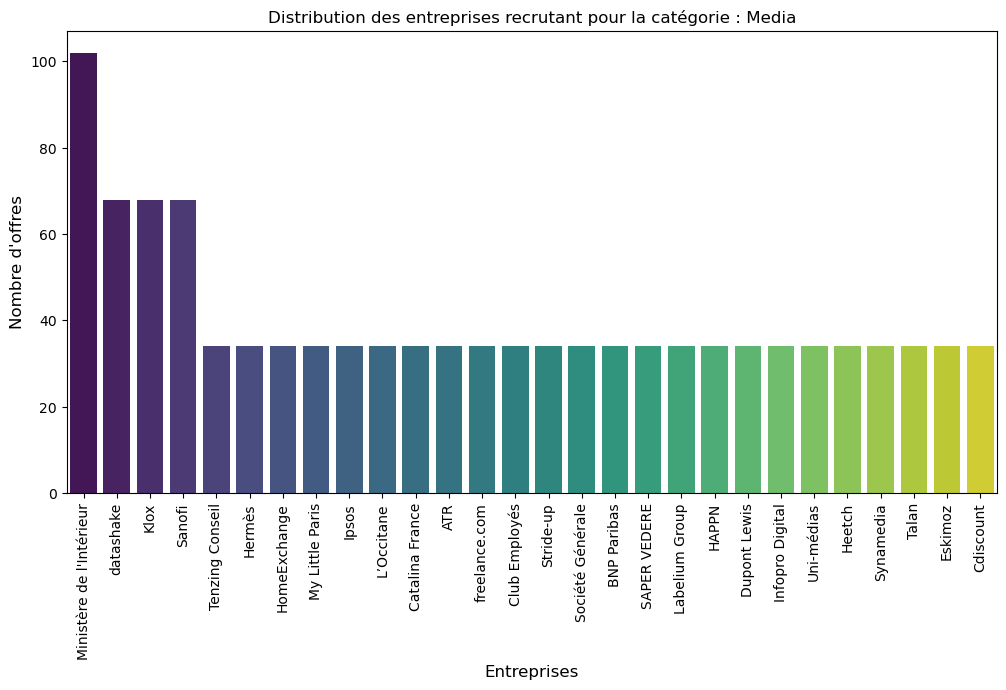

In [17]:
pie_chart_cat(df_1,"Media" )

* Le graphique montre le nombre d'offres par entreprise dans une catégorie donnée (Media).
* Quelques entreprises se démarquent (notamment les 3 premières avec un volume significatif d'offres).
* Le reste des entreprises présente une répartition relativement homogène, avec un volume plus faible.

-> Cela reflète une concentration des offres chez certaines entreprises clés.

In [23]:
typeContrat_num_2_str_dict = {
    0 : 'CDI',
    1 : 'CDD',
    2 : 'MIS', 
    3 : 'DIN', 
    4 : 'CCE', 
    5 : 'LIB', 
    6 : 'FRA', 
    7 : 'SAI', 
    8 : 'REP', 
    9 : 'DDI', 
    10 : 'TTI'
}

In [42]:
def pie_chart_cat(df):
    # Remplacer les indices numériques par des noms explicites
    df['contrat_label'] = df['contrat'].map(typeContrat_num_2_str_dict)
    
    # Calculer la répartition des contrats
    contrat_counts = df['contrat_label'].value_counts()
    
    # Combiner les catégories avec une faible proportion
    seuil = 0.03  # Proportion minimale pour garder une catégorie
    total = contrat_counts.sum()
    contrat_counts_filtered = contrat_counts[contrat_counts / total > seuil]
    autres = contrat_counts[contrat_counts / total <= seuil].sum()
    
    if autres > 0:
        contrat_counts_filtered['Autres'] = autres
    
    # Générer le graphique
    plt.figure(figsize=(14, 6))
    plt.pie(
        contrat_counts_filtered.values,
        labels=contrat_counts_filtered.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set3'),
        textprops={'fontsize': 12}
    )
    plt.title("Distribution des types de contrats", fontsize=16)
    plt.axis('equal')  # Assure que le pie chart est circulaire
    plt.tight_layout()
    plt.show()


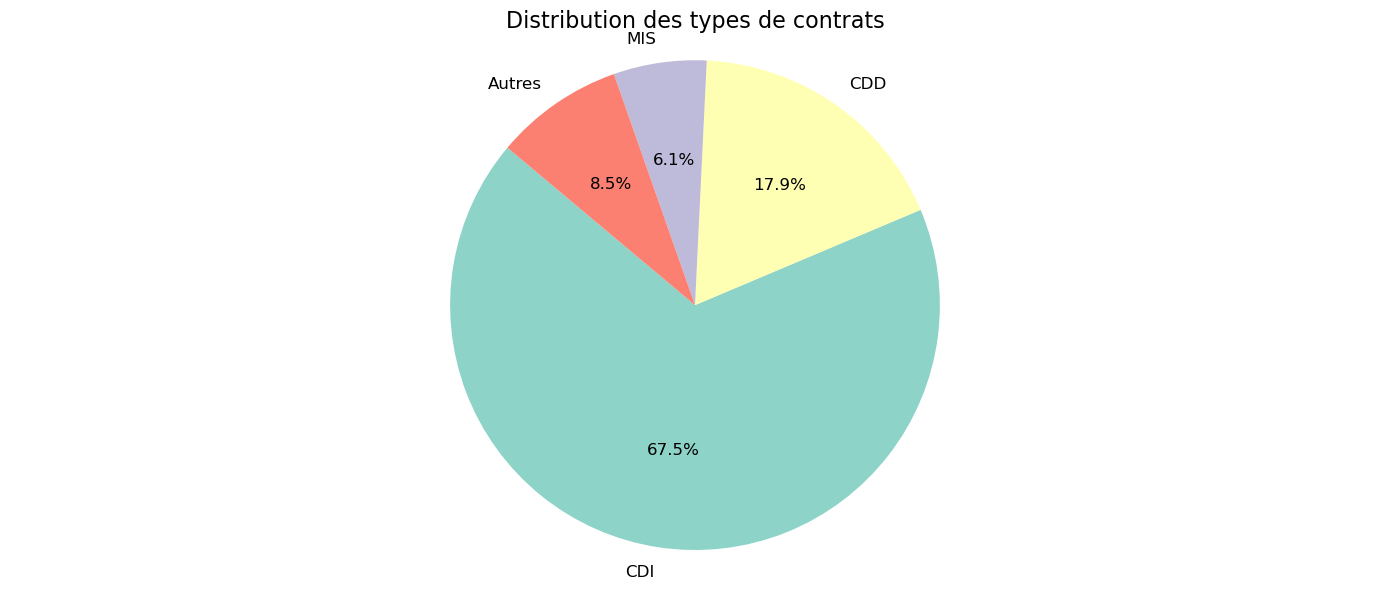

In [43]:
pie_chart_cat(df)

* Le graphique montre la répartition des types de contrats.
* Une part importante des contrats (67.5%) correspond aux contrats de type CDI.
* Les autres catégories sont beaucoup plus petites (17.9%, 6.1%, etc.), ce qui indique une prédominance des contrats de type CDI et donc des opportunités limitées pour d'autres types de contrats..

## Répartition des postes par catégorie

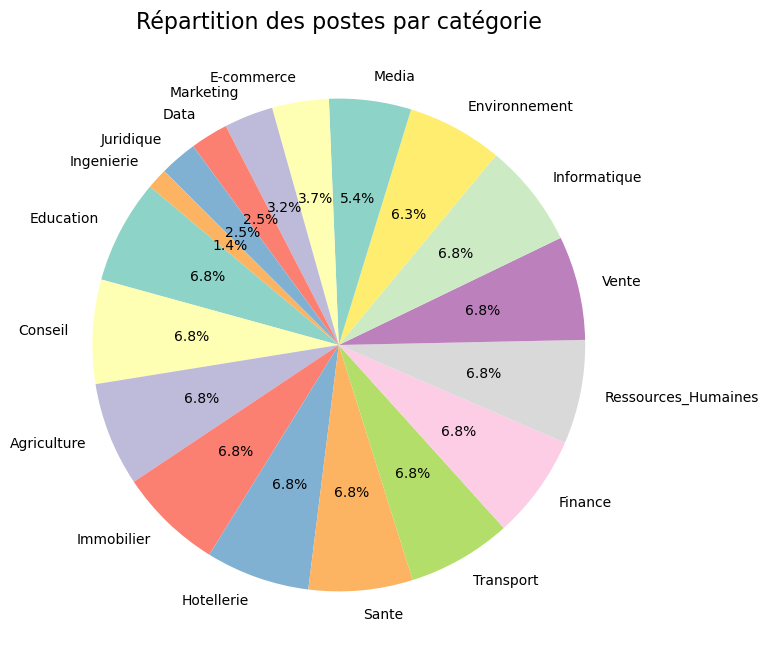

In [40]:
plt.figure(figsize=(8, 8))
job_count_by_category = df['source'].value_counts()
plt.pie(job_count_by_category, labels=job_count_by_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Répartition des postes par catégorie', fontsize=16)
plt.show()


* La majorité des postes se concentre dans des secteurs traditionnels tels que Santé, Agriculture, et Finance, qui sont souvent essentiels à l'économie.
* Les catégories comme Marketing, E-commerce, et Data sont moins représentées.
* Informatique et Environnement, avec des parts intermédiaires, reflètent l’importance croissante de ces secteurs dans l’économie moderne.

## Matrice de corrélation

/var/folders/z9/5zqjll8j4sn9css9l1zhyy640000gn/T/ipykernel_94381/3141821681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


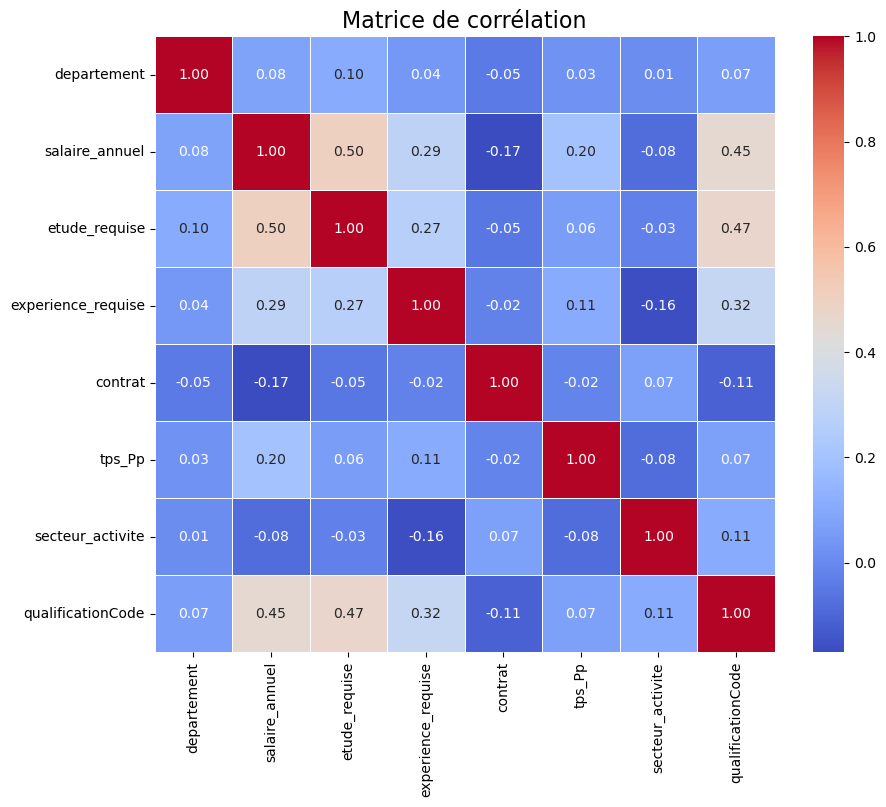

In [41]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation', fontsize=16)
plt.show()


1. **Corrélations fortes** :
    * salaire_annuel et etude_requise : Corrélation positive (0.50). Cela suggère qu'un niveau d'étude plus élevé est souvent associé à des salaires annuels plus importants.
    * salaire_annuel et qualificationCode : Corrélation positive (0.45). Cela indique que les qualifications spécifiques ont un lien avec le salaire.
    * etude_requise et qualificationCode : Corrélation positive (0.47). Les qualifications semblent être alignées avec les niveaux d'étude exigés.
2. **Corrélations faibles ou négligeables** :
    * La plupart des autres variables présentent des corrélations proches de 0 (entre -0.2 et 0.2), indiquant peu ou pas de lien linéaire direct entre elles. Par exemple :
        * departement et salaire_annuel (0.08) : La localisation semble avoir peu d'influence sur le salaire.
        * contrat et salaire_annuel (-0.17) : Type de contrat (CDI, CDD, etc.) n'a pas une forte corrélation avec le salaire.
3. **tps_Pp (temps plein ou partiel)** :
    * Corrélation modérée avec salaire_annuel (0.20). Les postes à temps plein sont légèrement plus associés à des salaires plus élevés.
    * Faible corrélation avec d'autres variables comme etude_requise (0.06) ou contrat (-0.02).
4. **secteur_activite** :
    * Très faible corrélation avec la plupart des variables (<0.1). Cela pourrait indiquer que le secteur d'activité ne joue pas un rôle majeur dans la variation de ces attributs.
